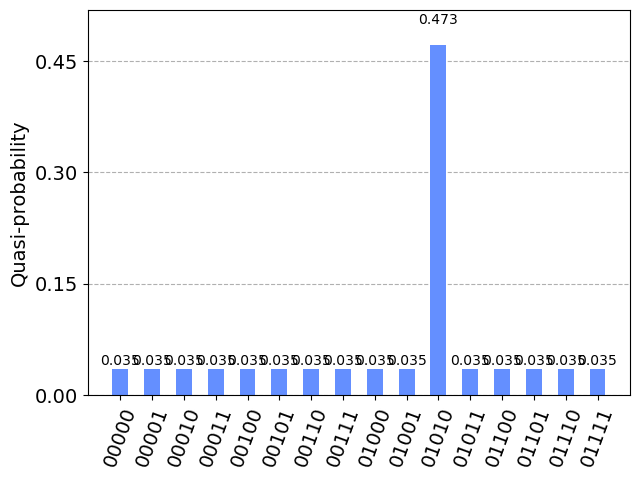

In [5]:
import matplotlib.pyplot as plt
from math import asin, sqrt
from qiskit import QuantumCircuit, Aer, execute, QuantumRegister, qasm
from qiskit.circuit.library import ZGate, XGate
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.tools.visualization import circuit_drawer
%matplotlib inline


qr = QuantumRegister(4)
ancilla = QuantumRegister(1)
qc = QuantumCircuit(qr, ancilla)

# --- Superposition über alle Zustände
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

# --- Ancillabit vorbereiten
qc.x(4)
qc.h(4)

# --- Quantenoracle anwenden
qc.x(0)
qc.x(2)
qc.append(XGate().control(4), [0,1,2,3,4])
qc.x(0)
qc.x(2) 

# --- Diffuser für Amplitudenverstärkung
qc.h(qr)
qc.x(qr)
qc.append(ZGate().control(3), [0,1,2,3])
qc.x(qr)
qc.h(qr)

#--- "uncomputation" Ancillabit
qc.h(4)
qc.x(4)


backend = Aer.get_backend("statevector_simulator")
results = execute(qc, backend).result().get_counts(qc)
plot_histogram(results)